# Customer Sagmentation Projects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

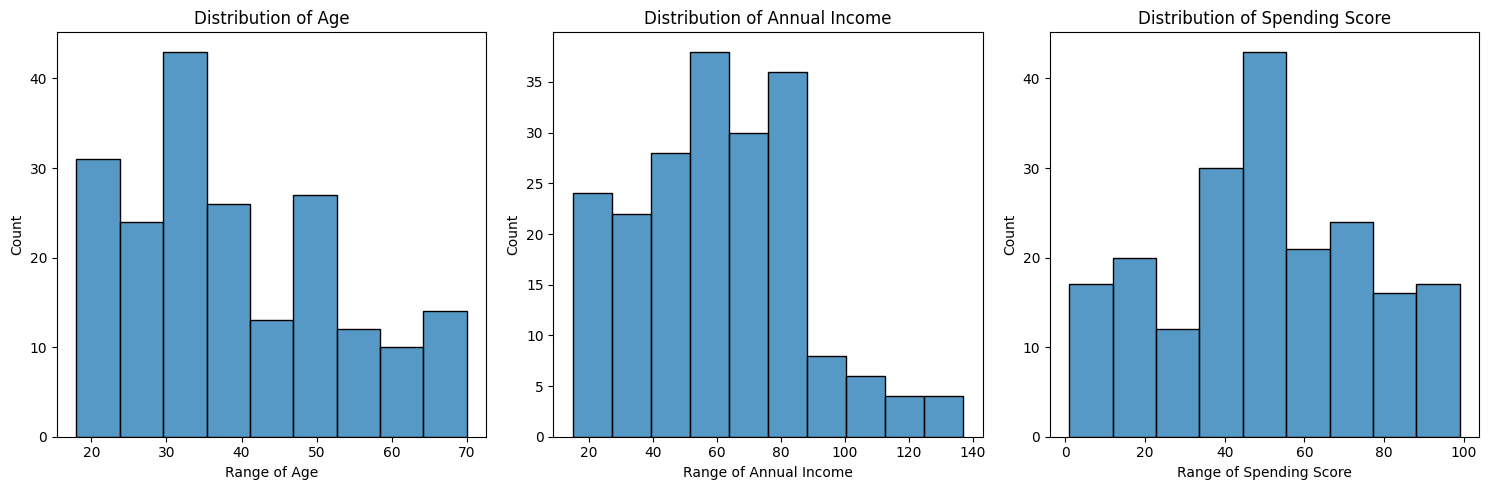

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.histplot(data["Age"])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.histplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income")
plt.xlabel("Range of Annual Income")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.histplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

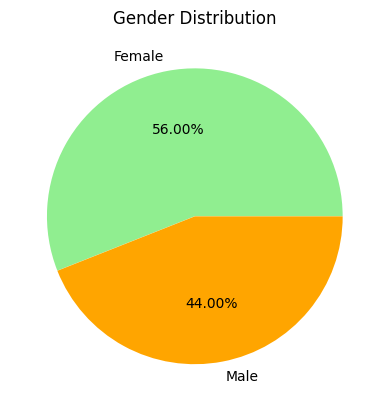

In [10]:
df = data.groupby("Gender").size()
df.plot(kind= 'pie', subplots = True,
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

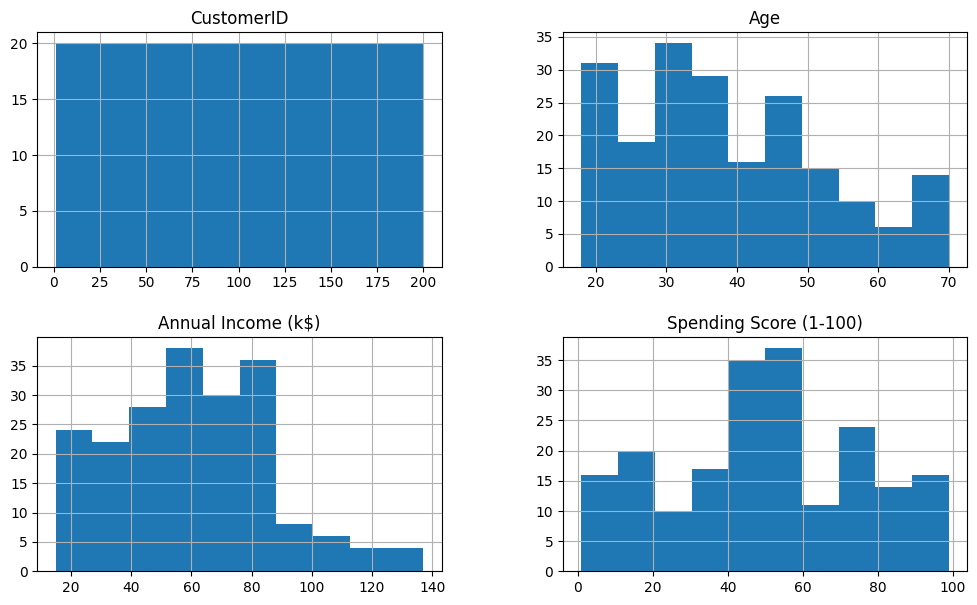

In [11]:
data.hist(figsize = (12,7))
plt.show()

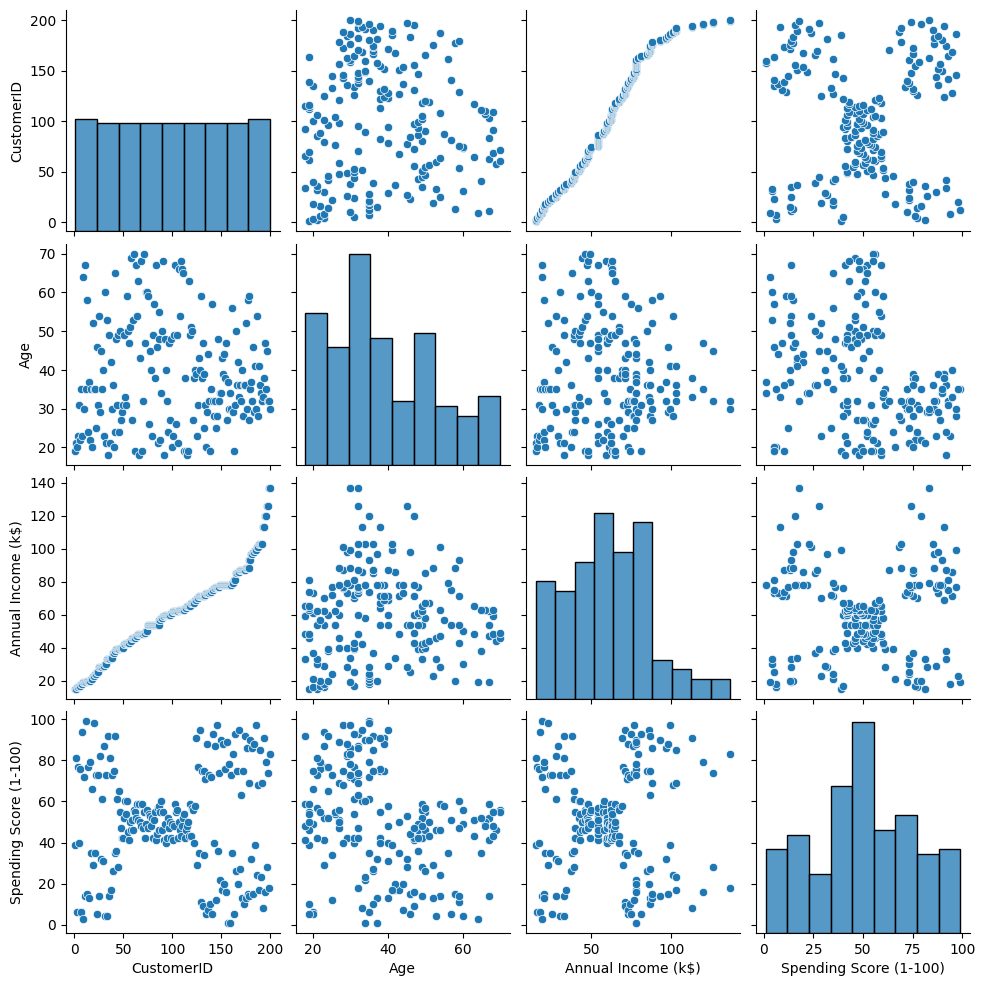

In [12]:
sns.pairplot(data)
plt.show()

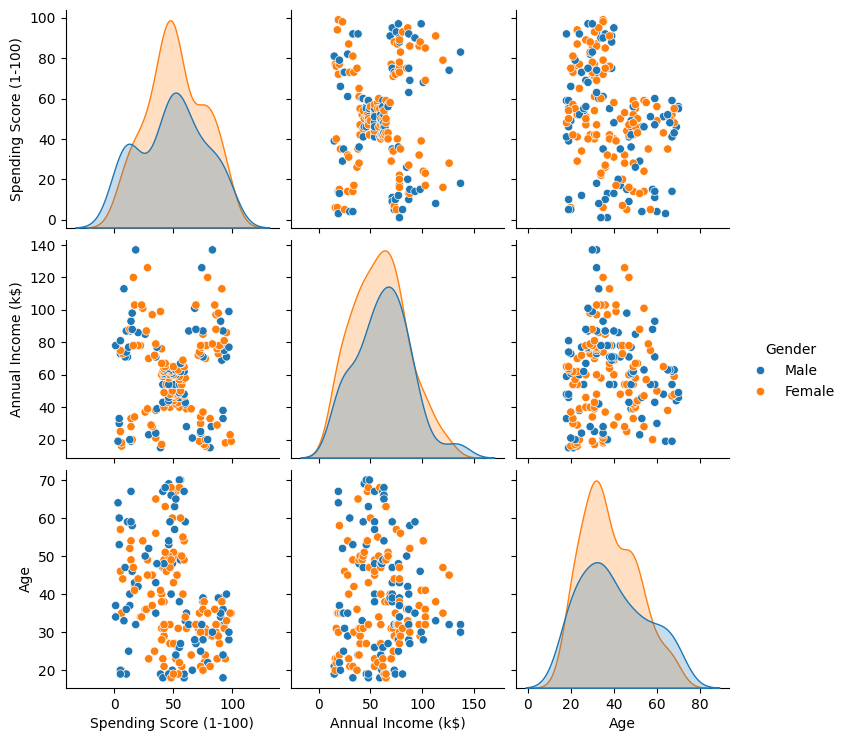

In [13]:
sns.pairplot(data, vars =['Spending Score (1-100)','Annual Income (k$)', 'Age'], hue = 'Gender')

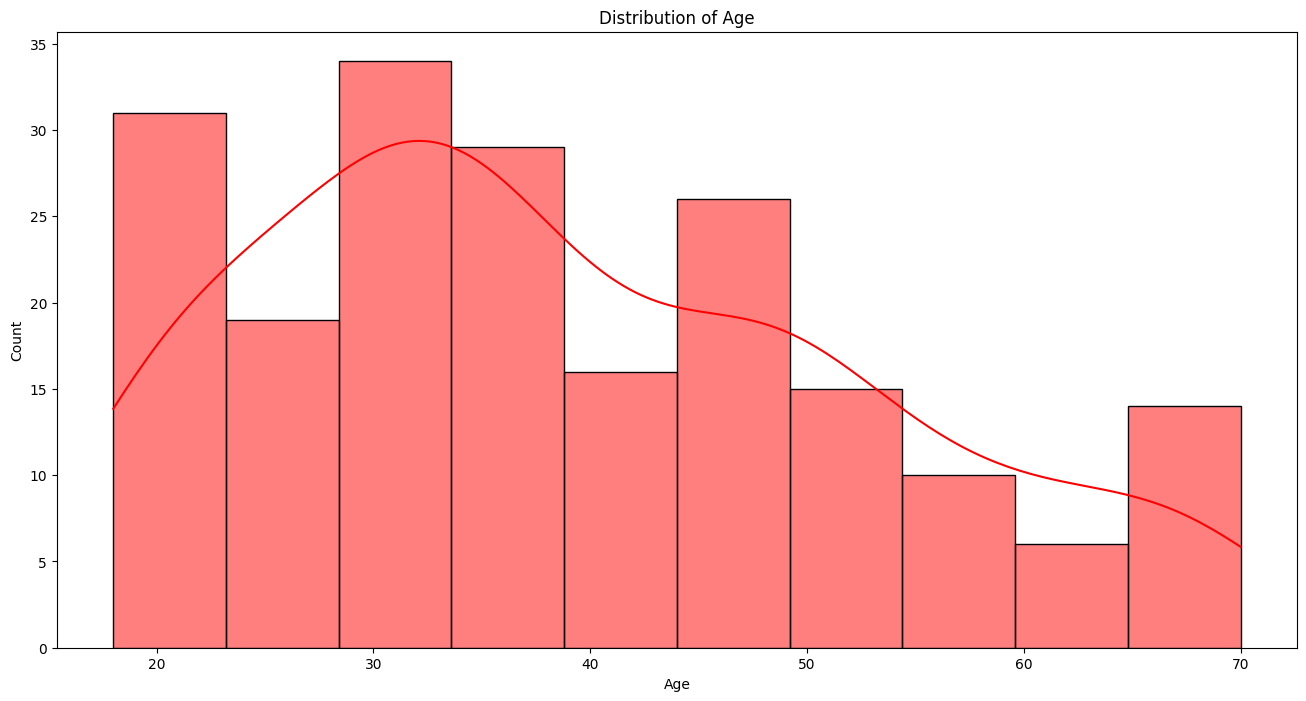

In [14]:
plt.figure(figsize=(16, 8))
sns.histplot(data['Age'], bins=10, kde=True, color='red')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


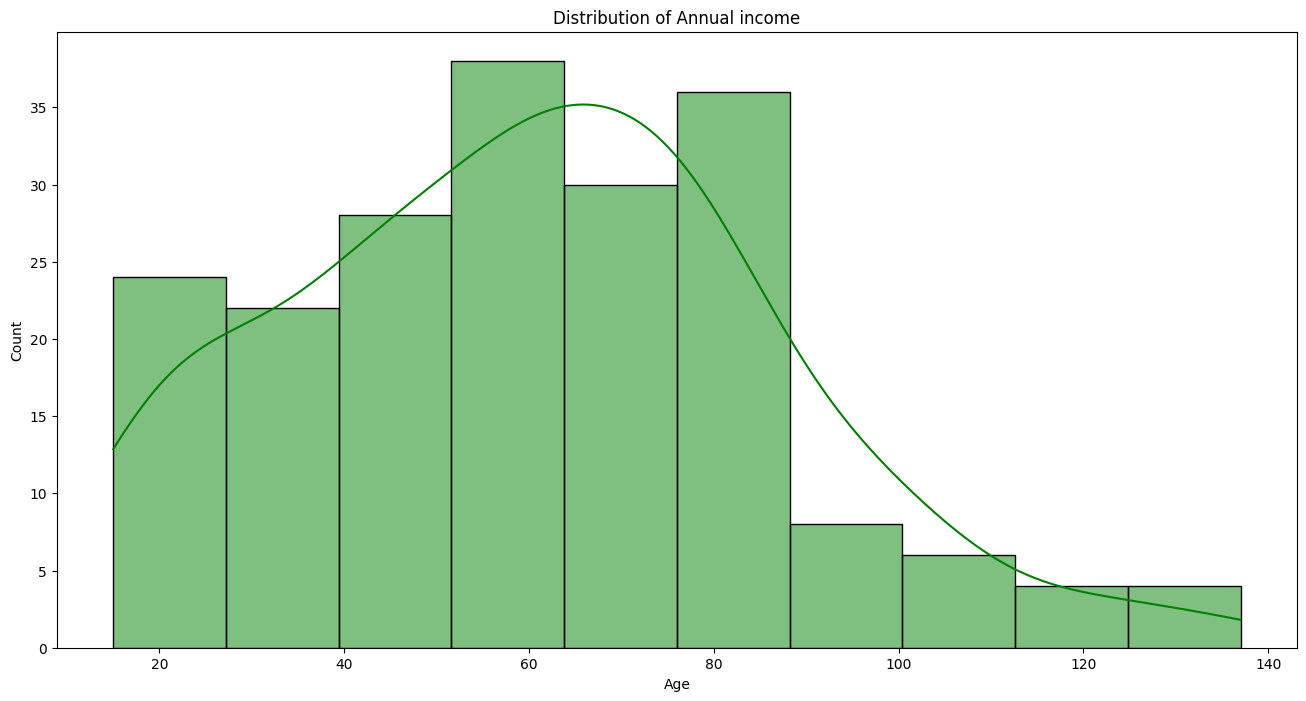

In [15]:
plt.figure(figsize=(16, 8))
sns.histplot(data['Annual Income (k$)'], bins=10, kde=True, color='Green')
plt.title("Distribution of Annual income")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

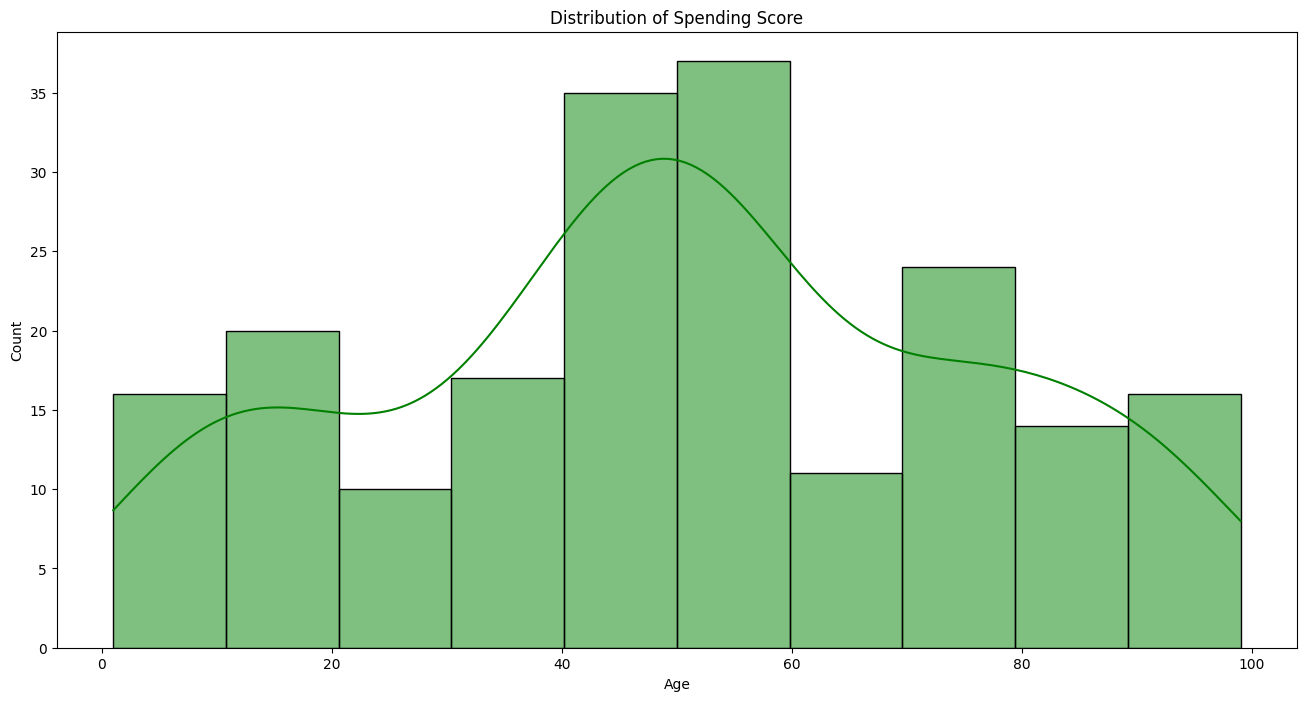

In [16]:
plt.figure(figsize=(16, 8))
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True, color='Green')
plt.title("Distribution of Spending Score")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

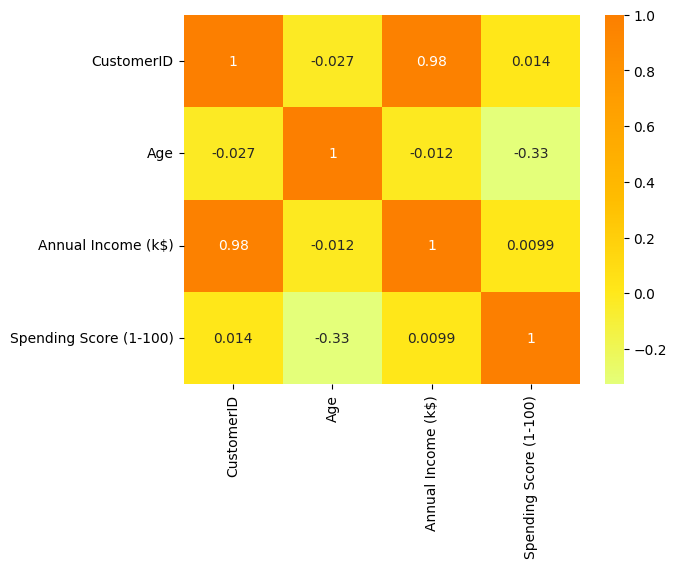

In [17]:
# Only Slelect Numaric Columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Creation of Corelation Matrix
sns.heatmap(numeric_data.corr(), cmap='Wistia', annot=True)
plt.show()


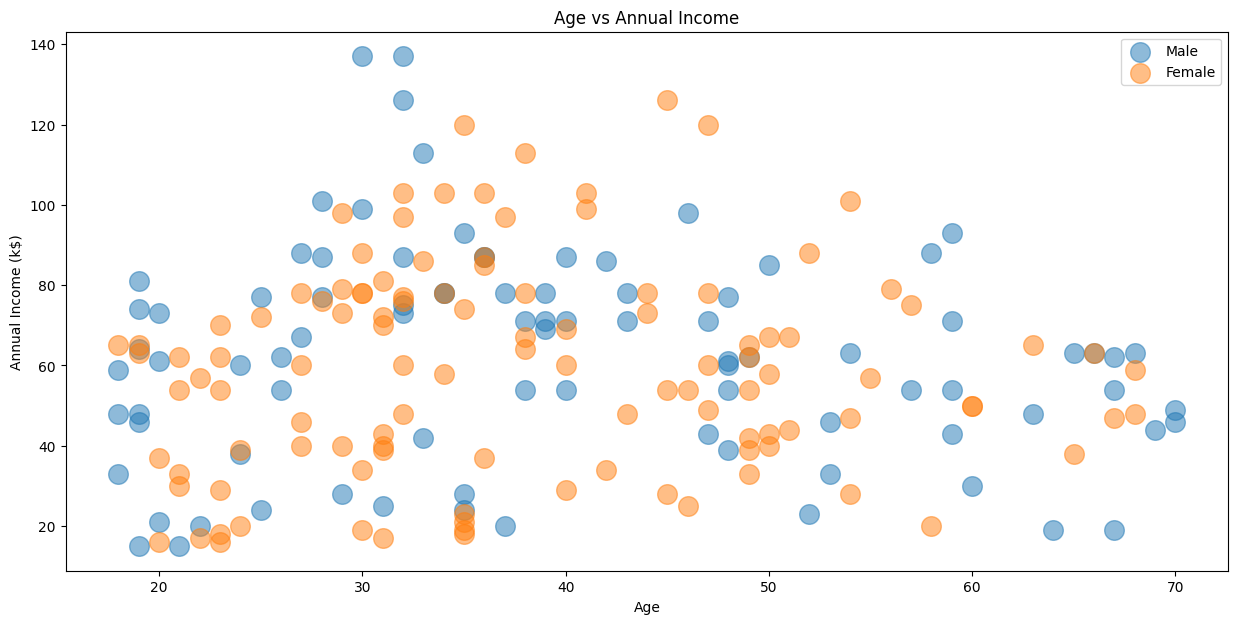

In [18]:
plt.figure(figsize=(15, 7))

for gender in ['Male', 'Female']:
    subset = data[data['Gender'] == gender]
    plt.scatter(x=subset['Age'], 
                y=subset['Annual Income (k$)'],
                s=200, alpha=0.5,
                label=gender)

plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()


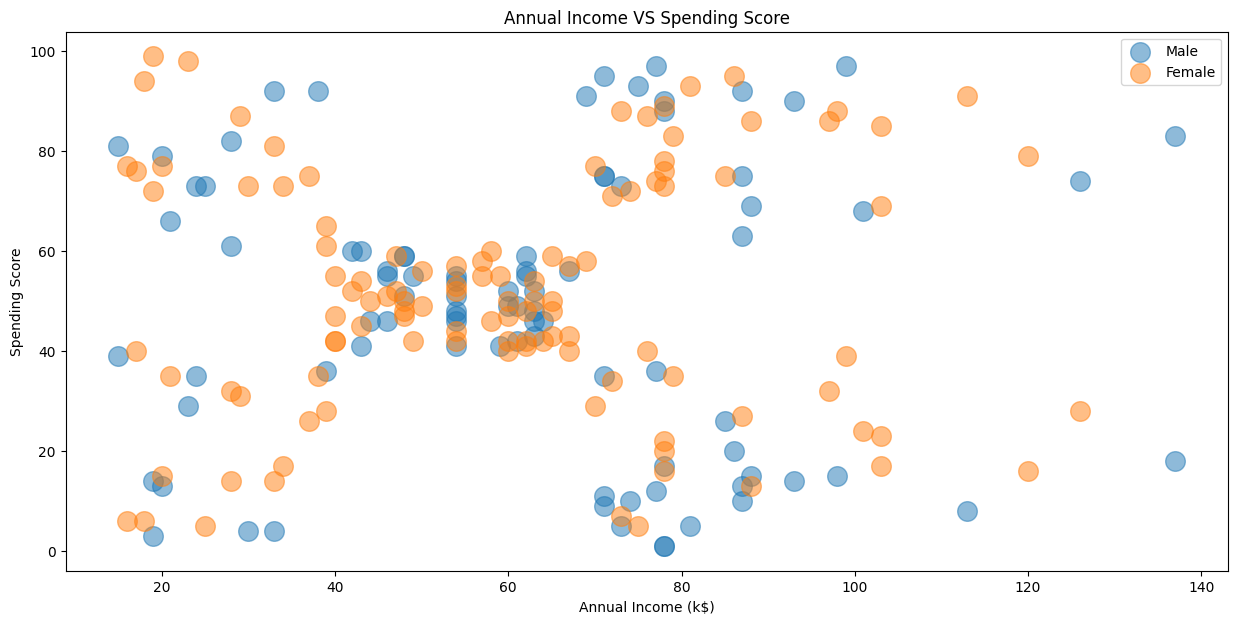

In [19]:
plt.figure(figsize=(15, 7))

for gender in ['Male', 'Female']:
    subset = data[data['Gender'] == gender]
    plt.scatter(x=subset['Annual Income (k$)'], 
                y=subset['Spending Score (1-100)'],
                s=200, alpha=0.5,
                label=gender)

plt.title("Annual Income VS Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Applying K-Means Clustring

In [20]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
x = data.iloc[:,[3,4]].values

In [22]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [23]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from sklearn.cluster import KMeans

In [34]:
k = []
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

C:\Users\AU TRADERS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AU TRADERS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AU TRADERS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AU TRADERS\AppData\Roaming\Python\Python311\site-packag

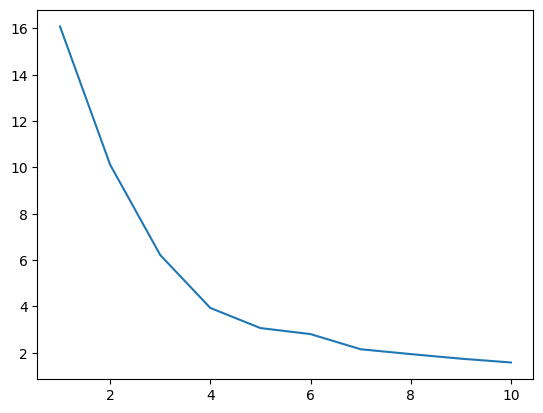

In [35]:
plt.plot(range(1,11), k)
plt.show()

In [38]:
models = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [43]:
y_kmeans = models.fit_predict(x)

C:\Users\AU TRADERS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


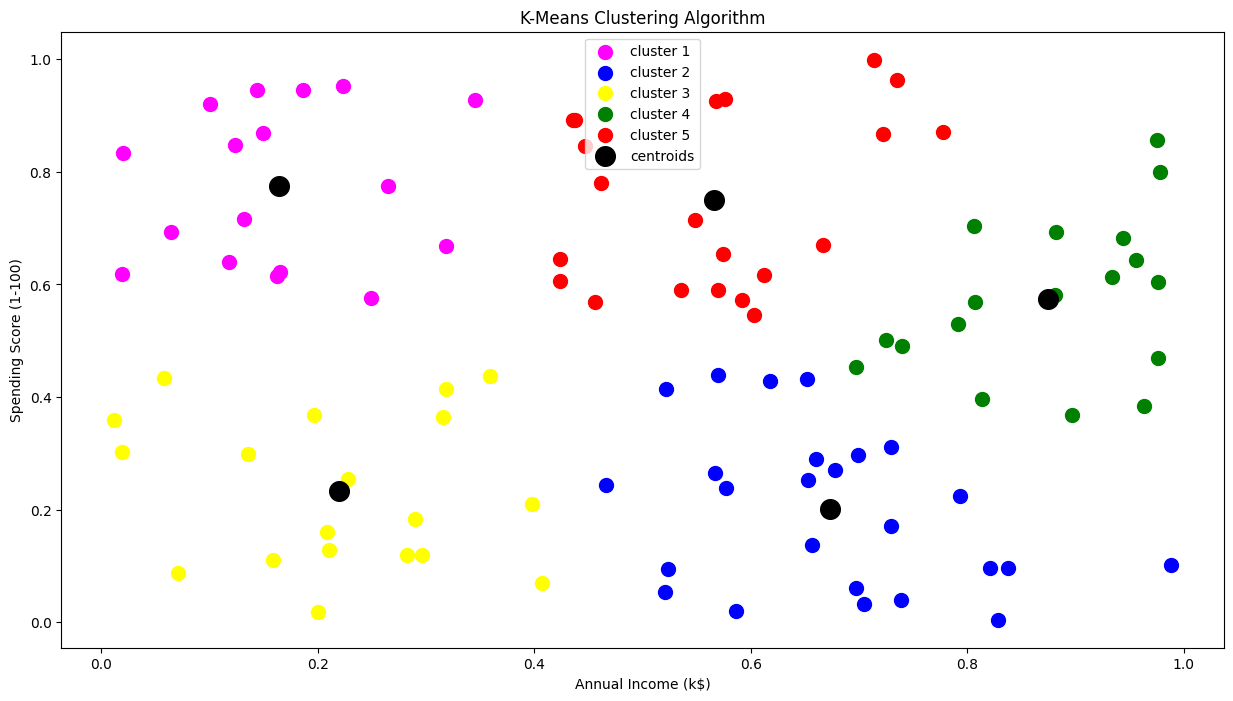

In [50]:
plt.figure(1, figsize=(15, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='magenta', label='cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='yellow', label='cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='green', label='cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='red', label='cluster 5')
plt.scatter(models.cluster_centers_[:, 0], models.cluster_centers_[:, 1], s=200, c='black', label='centroids')
plt.title('K-Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()